In [1]:
import numpy as np
from scipy import stats

In [2]:
N_vac = 21720 # Total number of participants who received the vaccine
N_plac = 21728 # Total number of participants who received the placebo

N_vac_cov = 8 # Total number of vaccinated participants who got covid-10
N_plac_cov = 162 # Total number of unvaccinated participants who got covid-10

In [3]:
print(np.sqrt(N_plac_cov))

12.727922061357855


In [4]:
p_value = stats.poisson.cdf(k=N_vac_cov,mu=N_plac_cov)
print(p_value)

5.454353785739716e-58


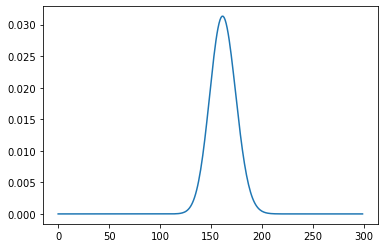

In [5]:
import matplotlib.pyplot as plt
x = np.arange(300)
plt.plot(x, stats.poisson.pmf(x,mu=N_plac_cov))

In [6]:
def z_score(val, mu, sigma):
    """The Z-score describes how many sigma away from the mean a value is."""
    return (val-mu)/sigma

In [7]:
z_val = z_score(N_vac_cov, N_plac_cov, np.sqrt(N_plac_cov))
print(f'Z score of vaccinated people if drawn from the same distribution as the unvaccinated people: {z_val:.3f}')

Z score of vaccinated people if drawn from the same distribution as the unvaccinated people: -12.099


In [8]:
efficacy = (N_plac_cov - N_vac_cov)/N_plac_cov
print(efficacy)

0.9506172839506173


In [9]:
from IPython.core.display import Latex
# Import SymPy: 
from sympy import * 

def lprint(*args,**kwargs):
    """Pretty print arguments as LaTeX using IPython display system 
    
    Parameters
    ----------
    args : tuple 
        What to print (in LaTeX math mode)
    kwargs : dict 
        optional keywords to pass to `display` 
    """
    display(Latex('$$'+' '.join(args)+'$$'),**kwargs)

In [10]:
Nv, Np, E = symbols('Nv, Np, E')
sNv, sNp, sE = symbols('sigma_Nv, sigma_Np, sigma_E')

E = (Np - Nv)/Np
lprint(latex(Eq(symbols('E'),E)))

sE = sqrt( (E.diff(Nv)*sNv)**2 + (E.diff(Np)*sNp)**2 )
lprint(latex(Eq(symbols('sigma_E'),sE)))

fE = lambdify((Nv,Np),E)
fsE = lambdify((Nv,sNv,Np,sNp),sE)

vNv = N_vac_cov
vNp = N_plac_cov
vsNv = np.sqrt(N_vac_cov)
vsNp = np.sqrt(N_plac_cov)

vE = fE(vNv,vNp)
vsE = fsE(vNv,vsNv,vNp,vsNp)

lprint(fr'E = ({vE:.5f} \pm {vsE:.5f})')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [11]:
p_value = stats.poisson.cdf(k=1,mu=9)
print(p_value)

0.0012340980408667957


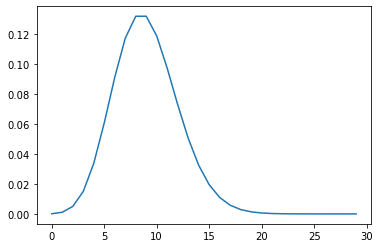

In [12]:
x = np.arange(30)
plt.plot(x, stats.poisson.pmf(x,mu=9))